# Carregar as bibliotecas

In [ ]:
import numpy as np
from skimage import io, data, filters, util, color, transform, exposure, measure
from skimage.util import img_as_float, img_as_uint, img_as_ubyte
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, svm
from sklearn.model_selection import train_test_split
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
# blblioteca para arquivos zipados
import zipfile
# biblioteca para tranalhar com arquivos
import os

### Download do arquivo numbers.zip

In [ ]:
!gdown 1g7sA9bPWYOKRcTew88EDV_mdxR0j1rl4

Downloading...
From: https://drive.google.com/uc?id=1g7sA9bPWYOKRcTew88EDV_mdxR0j1rl4
To: /content/numbers.zip
100% 15.1k/15.1k [00:00<00:00, 28.1MB/s]


### Descomprimir arquivo zip

In [ ]:
local_zip = 'numbers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [ ]:
m_path = 'tmp/numbers'
img_files = os.listdir(m_path)
print(img_files)

['num1.jpg', 'num3.jpg', 'num0.jpg', 'num4.jpg', 'num5.jpg', 'num6.jpg', 'num7.jpg', 'num2.jpg', 'num9.jpg', 'num8.jpg']


### Ordena alfabeticamente os nomes dos arquivos

In [ ]:
img_files.sort()
print(img_files)

['num0.jpg', 'num1.jpg', 'num2.jpg', 'num3.jpg', 'num4.jpg', 'num5.jpg', 'num6.jpg', 'num7.jpg', 'num8.jpg', 'num9.jpg']


# Questão 1

<p align="justify">O reconhecimento de padrões é o estudo de como as máquinas observam seu entorno, aprendem a distinguir padrões de interesse e tomam decisões razoáveis sobre as categorias dos padrões Um padrão é uma descrição de um objeto. Um computador consegue reconhecer padrões, convertendo-os em sinais digitais e comparando-os com outros sinais já armazenados na memória.  </p>

<p align="justify">
Um sistema de reconhecimento geralmente compreende três componentes principais: pré-processamento, extração de características e classificação. Na etapa de pré-processamento, os dados de entrada são manipulados por uma variedade de métodos que fazem operações, tais como remoção de ruído, segmentação e melhoramento da qualidade dos mesmos. Na extração de características, o objetivo é representar os dados de entrada em termos de medidas quantificáveis que possam ser utilizados facilmente na etapa de classificação. O problema do reconhecimento de padrões é reconhecer padrões que sejam, em algum
sentido, "os mesmos" apesar de ter experimentado uma variedade de transformações permitidas. Os padrões na vida real apresentam transformações geométricas lineares (rotação, escala e translação), deformações não lineares e variância de iluminação e <i>background</i>, etc. Este tipo de reconhecimento pode ser uma tarefa simples para os seres humanos e para os animais, mas converte-se em um grande problema se tentamos realizá-lo através de um computador. Os métodos tradicionais de reconhecimento de padrões carecem da habilidade para reconhecer o mesmo padrão com certo tipo de variância.</p>

<p align="justify">
Execute os seguintes pasos para cada imagem da base de dados:
</p>

<ol>
    <li>Para cada inagem fornecida, gere 20 imagens com diferentes rotações</li>
    <li>Cada imagem rotacionado deve ser redimensionada em seis diferentes escalas: 0.5, 0.75, 1, 1.25, 1.5, 2</li>
    <li>Inserir ruído tipo sal e pimenta en cada imagem redimensionada. Use os seguintes valores de rúido: 0, 0.01, 0.02, 0.03</li>
    <li>Extrair os momentos de Hu de cada imagem e salvar o descritor em uma matriz e a etiqueta a qual pertence em um vetor.</li>

</ol>


In [ ]:
def Hu_moments(img):
  momentos_centrais = measure.moments_central(img)
  momentos_normalizados = measure.moments_normalized(momentos_centrais)
  momentos_hu = measure.moments_hu(momentos_normalizados)
  return momentos_hu

<p align="justify">  Função <i>feature_extraction()</i> extrai as características de todas as imagens e salva em uma matriz os vetores de caractarísticas. Não é necessário salvar as imagens, crie a imagem e logo faça a extração de características. </p>

In [ ]:
def feature_extraction(m_path, img_files):

  # informações sobre os ângulos, tamanhos e porcentagem de ruído
  angs = np.linspace(0,180,20)
  tams = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
  ruidos = [0, 0.01, 0.02, 0.03, 0.04]

  # Calcula o número total de imagens que serão geradas
  N = len(img_files) * len(angs) * len(tams) * len(ruidos)

  # matriz que deve conter os vetores de características
  hu_X = np.zeros( (N,7) )

  # etiquetas de cada um dos vetores de características
  hu_Y = np.zeros( (N) )

  # índice usado para salvar los vetores dentro da matriz
  pos = 0

  for l, file in enumerate(img_files):
      # l será usado como etiqueta e file é o nome do arquivo
      img = io.imread(os.path.join(m_path, file), as_gray = True)
      for angle in angs:
        img_r = transform.rotate(img, angle)
        for scale in tams:
          img_s = transform.rescale(img_r, scale)
          for noise in ruidos:
            hu_X[pos, :] = Hu_moments(util.random_noise(img_s, mode='s&p', amount=noise))
            hu_Y[pos] = l
            pos+=1

  return hu_X, hu_Y


In [ ]:
hu_X, hu_Y = feature_extraction(m_path='tmp/numbers', img_files = img_files)

<ol start="5">
  <li>Normalizar os dados.</li>
    <li>Dividir a base em dois conjuntos, uma para teste e o outro para treino.</li>
    <li>Realizar o treinamento usando um classificador SVM</li>
    <li>Calcule a taxa de acerto para cada tipo de digito. Além disso, gere uma matriz de confusão.</li>
</ol>


### Normalizar os dados

In [ ]:
minMaxScaler = preprocessing.MinMaxScaler().fit(hu_X)
hu_X = minMaxScaler.transform(hu_X)

### Dividir o conjunto de dados en treino e teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(hu_X, hu_Y, test_size=0.2)

### Instanciar o modelo SVM e treinar

In [ ]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC()

## Calcular a matriz de confusão

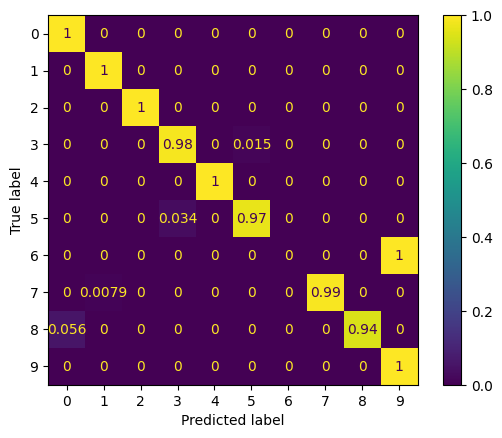

In [ ]:
matriz = metrics.confusion_matrix(y_test, svm_model.predict(x_test))
matriz = matriz / np.sum(matriz, axis=1, keepdims=True)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

# Questão 2

<p>Avaliar o modelo treinado reconhecendo os números nas seguinte imagem:</p>

<img src="https://drive.google.com/uc?id=1iewo9yp9i_S-AXAvkdJA0LzUeKZNJGi7" alt="Drawing"  width="700"/> </td>

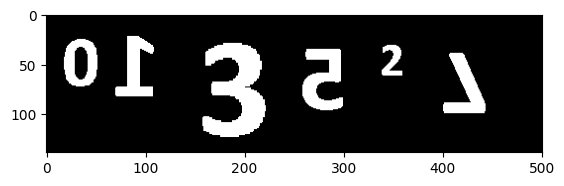

In [ ]:
img = io.imread('https://drive.google.com/uc?id=1iewo9yp9i_S-AXAvkdJA0LzUeKZNJGi7', as_gray=True)
img = img > 0.5
plt.imshow(img, cmap='gray')

<p align="justify">O seguinte código gera os <i>bounding box</i> ao redor de cada número</p>

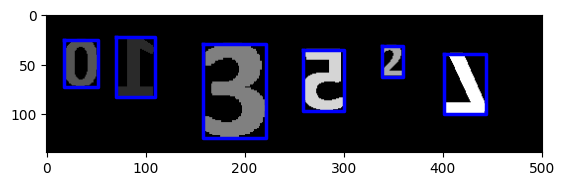

In [ ]:
img_label = measure.label(img)
regions = measure.regionprops(img_label)
fig, ax = plt.subplots()
ax.imshow(img_label, cmap=plt.cm.gray)
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

[1.]
[0.]
[3.]
[2.]
[5.]
[7.]


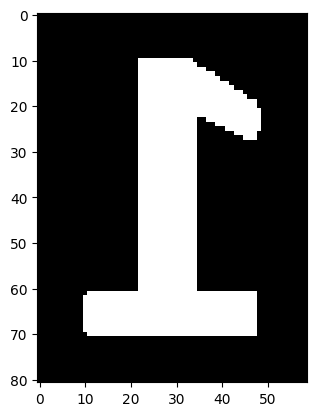

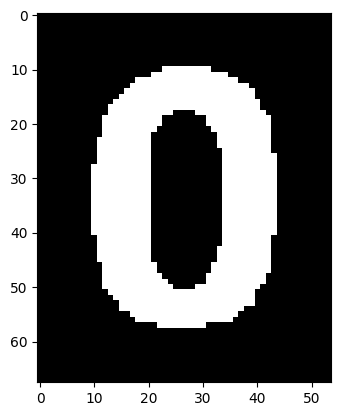

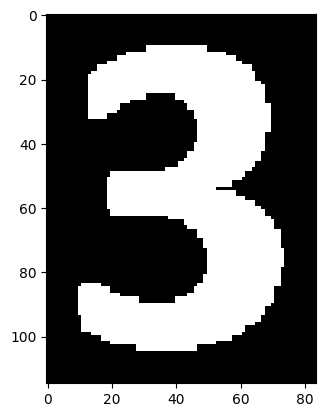

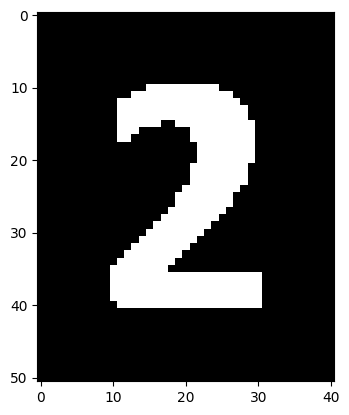

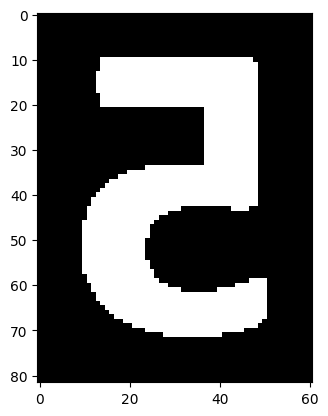

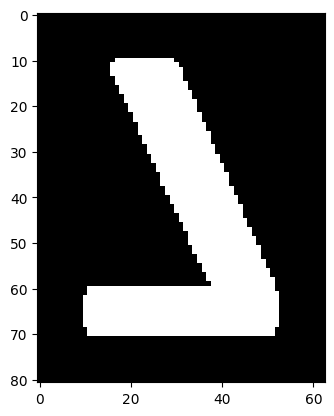

In [ ]:
delta = 10
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    minr -= delta
    minc -= delta
    maxr += delta
    maxc += delta
    patch = img[minr:maxr, minc:maxc]
    prediction = svm_model.predict(minMaxScaler.transform(Hu_moments(patch).reshape(1, -1)))
    print(prediction)
    plt.figure()
    plt.imshow(patch, cmap='gray')

<p align="justify">Reconheça cada ums dos caracteres segmentados usando o modelo treinado</p>

[1.]
[0.]
[3.]
[2.]
[5.]
[7.]


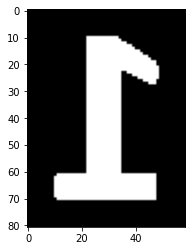

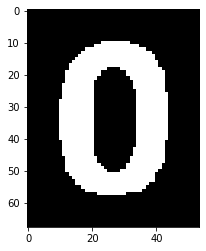

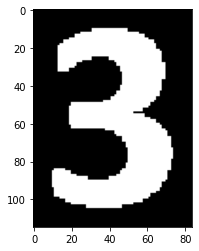

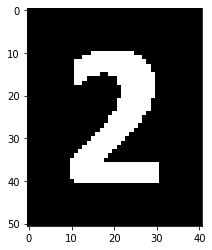

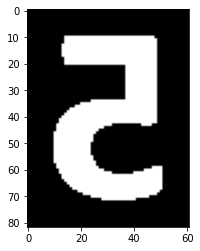

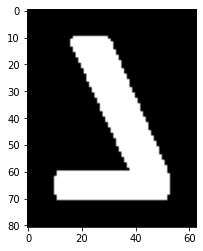

In [ ]:
# GABARITO
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    minr -= delta
    minc -= delta
    maxr += delta
    maxc += delta
